In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [74]:
col_index = ["query acc.ver", "subject acc.ver", "identity_percent", "alignment length", "mismatches", "gap opens", "q. start", "q. end", "s. start", "s. end", "evalue", "bit score"]
df = pd.read_csv("conservation_evaluation/blast_hits.txt", names=col_index, header=None, sep='\t')

In [77]:
df.head()

,query acc.ver,subject acc.ver,identity_percent,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score
0,A0A0K3AY91_1,NP_741657.2,100.000,27,0,0,1,27,10,36,7.270000e-16,80.4
1,A0A0K3AY91_1,NP_001300234.1,100.000,27,0,0,1,27,10,36,1.920000e-15,79.1
2,A0A0K3AY91_1,WP_109195076.1,70.588,17,2,1,11,27,18,31,7.500000e+00,34.6
3,A0A0K3AY91_1,WP_070023135.1,70.588,17,2,1,11,27,18,31,7.600000e+00,34.6
4,A0A0K3AY91_1,WP_070001699.1,70.588,17,2,1,11,27,18,31,7.600000e+00,34.6


In [76]:
df_grouped = df.groupby(df["query acc.ver"])

In [80]:
df["query acc.ver"].value_counts()

O01854_27       519
P10984_48       504
P10984_49       504
P10984_47       503
P10984_50       502
P91873_68       501
O17680_33       500
O62178_45       500
E2JL04_8        500
O45815_42       500
O01493_25       500
Q09582_71       500
P27604_53       500
P12845_52       500
P34519_58       500
H7BRC9_24       500
P50880_60       500
Q17770_74       500
P50432_59       500
O17921_36       500
Q03604_69       500
P52713_61       500
P55216_63       500
P53013_62       500
P12456_51       500
P90829_65       500
P34369_56       500
Q9UAV5_117      500
O02641_28       391
Q22938_86       375
               ... 
Q95Q36_99         5
Q09602_72         5
O44563_39         5
P90925_66         5
O16297_29         4
Q22649_85         4
Q9TYW2_114        4
G5EFC7_17         4
Q9N4J2_108        4
Q27471_89         4
Q95Y69_100        4
O01574_26         4
Q21571_81         4
Q23155_88         4
G5EG98_21         3
P91401_67         3
O62450_46         3
G5EEQ5_16         3
G5EFJ8_19         3


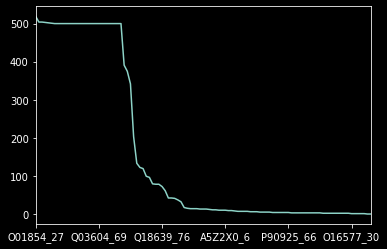

In [81]:
df["query acc.ver"].value_counts().plot()

0.42762675779712706


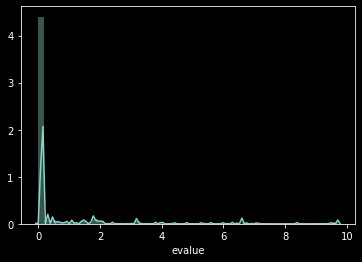

In [82]:
value_of_target = df[df["query acc.ver"] == "O01854_27"]['evalue']
print(value_of_target.mean())
sns.distplot(value_of_target, bins=50)

4.727874731508948


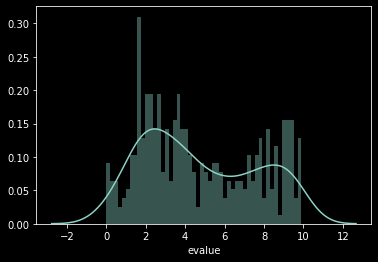

In [85]:
value_of_target = df[df["query acc.ver"] == "O02641_28"]['evalue']
print(value_of_target.mean())
sns.distplot(value_of_target, bins=50)

df[df["query acc.ver"] == "Q95ZK4_101"]

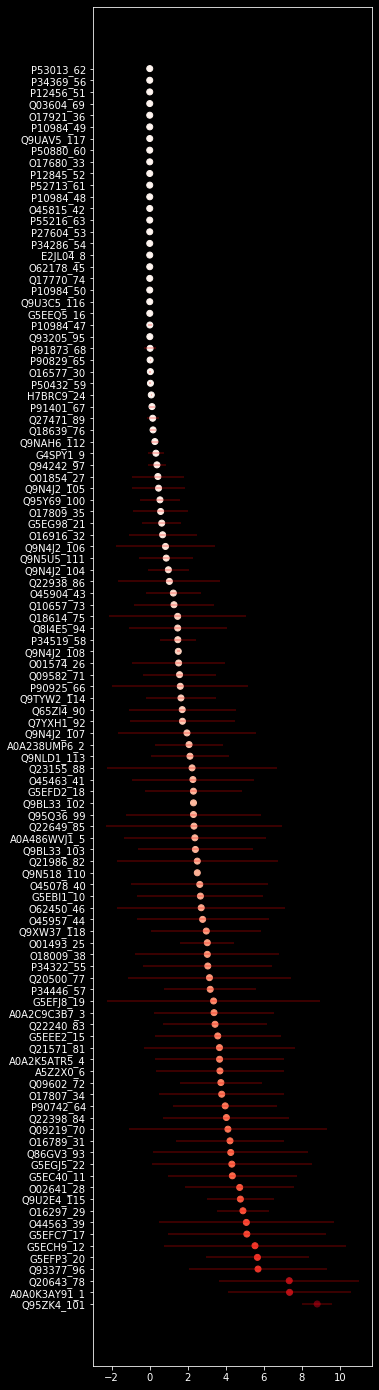

In [200]:
evalue_mean = df_grouped['evalue'].mean()
evalue_std = df_grouped['evalue'].std()
label = [i[0] for i in list(df_grouped)]

df2 = pd.DataFrame(index=label)
df2['mean'] = evalue_mean
df2['std'] = evalue_std
df3 = df2.sort_values(by='mean', ascending=False)

plt.figure(figsize=(5, 25))
plt.scatter(df3['mean'], df3.index, c=df3['mean'].values, cmap=plt.cm.Reds)
plt.hlines(df3.index, df3['mean']-df3['std'], df3['mean']+df3['std'], colors='red', alpha=0.3)

In [204]:
df3['mean'].to_csv("conservation_evaluation/evalue.txt", header=False)

In [228]:
from collections import defaultdict
fr1 = open("conservation_evaluation/to_search.fas", 'r')
fr2 = open("conservation_evaluation/evalue.txt", 'r')
fw = open("final.txt", 'w')

key_evalue_dict = defaultdict(dict)

for line in fr1:
    if line.startswith('>'):
        label = line[1:].replace("\n", "")
    else:
        seq = line
        key_evalue_dict[label]['seq'] = seq.replace("\n", "")


for line in fr2:
    label, evalue = line.split(',')
    key_evalue_dict[label]['evalue'] = float(evalue.replace("\n", ""))

for k, v in key_evalue_dict.items():
    fw.write(k + "\t" + v['seq'] + "\t" + str(v.get('evalue')) + "\n")

fr1.close()
fr2.close()
fw.close()

# print(key_evalue_dict['A0A0K3AY91_1'])



In [232]:
original_df = pd.read_excel("conservation_evaluation/Help On bioinformatic analysis.xlsx")
original_df.head()

,ID,Sequence,Modifications,Master Protein Accessions
0,3,TLLAVISESSSSDDYLEALAEIEGLVK,1xNitro [Y15],A0A0K3AY91
1,1,VLEVEASIASISATTGIQYDLK,1xNitro [Y19],A0A238UMP6
2,2,LILNHAAPYDLGEYVCTAINEYGTDK,1xCarbamidomethyl [C16]; 1xNitro [Y22],A0A2C9C3B7; O01761
3,4,GGLGISVVNGLQEELIYAHFGGIVVSAR,1xNitro [Y17],A0A2K5ATR5
4,0,EIDYFVGIQHVLQSTPK,1xNitro [Y4],A0A486WVJ1


In [302]:
seq2evalue = dict(zip([v.get('seq') for v in key_evalue_dict.values()], [v.get('evalue') for v in key_evalue_dict.values()]))

In [304]:
original_df['evalue'] = original_df['Sequence'].map(seq2evalue)

In [306]:
 original_df.head()

,ID,Sequence,Modifications,Master Protein Accessions,evalue
0,3,TLLAVISESSSSDDYLEALAEIEGLVK,1xNitro [Y15],A0A0K3AY91,7.350000
1,1,VLEVEASIASISATTGIQYDLK,1xNitro [Y19],A0A238UMP6,2.066667
2,2,LILNHAAPYDLGEYVCTAINEYGTDK,1xCarbamidomethyl [C16]; 1xNitro [Y22],A0A2C9C3B7; O01761,3.379883
3,4,GGLGISVVNGLQEELIYAHFGGIVVSAR,1xNitro [Y17],A0A2K5ATR5,3.670552
4,0,EIDYFVGIQHVLQSTPK,1xNitro [Y4],A0A486WVJ1,2.372000


In [307]:
original_df.to_excel("conservation_degree.xlsx")